# Visualise long tail problem and other eda 

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
parent_dir = '../../../'

In [90]:
# plot params:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white' # white or EAEAF2

#### Investigate Long Tail Problem:

In [4]:
ratings = pd.read_csv(parent_dir + 'data/mod_ratings_lc', index_col = 0)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
count_ratings = {}
for movie in ratings['movieId']:
    count_ratings[movie] = count_ratings.get(movie, 0) + 1
len(count_ratings)

9724

In [9]:
sorted_high_rated = sorted(count_ratings.items(), key = lambda x: x[1], reverse = True)

In [82]:
sorted_high_rated[-3000:]

array([[170837,      1],
       [170993,      1],
       [171751,      1],
       ...,
       [160836,      1],
       [163937,      1],
       [163981,      1]])

In [31]:
x, y = list(count_ratings.keys()), list(count_ratings.values())

In [32]:
type(x)

list

In [33]:
type(y)

list

In [51]:
sns.countplot(x = x, y = y)

TypeError: Cannot pass values for both `x` and `y`

In [52]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [54]:
num_ratings = ratings.groupby('movieId').count().drop('userId', axis = 1)

In [55]:
num_ratings.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


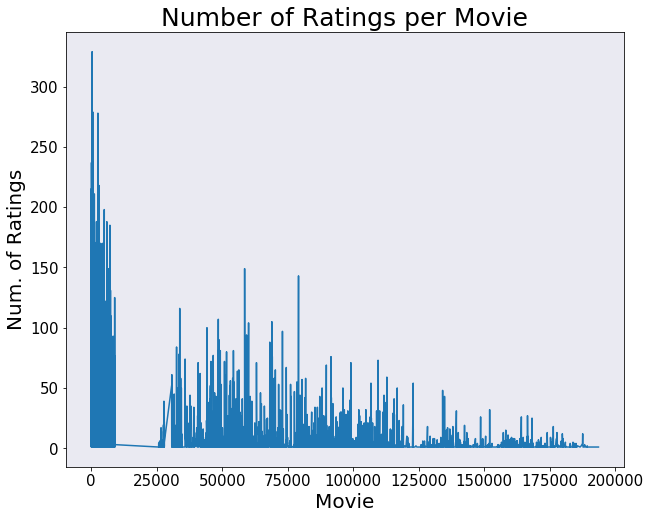

In [80]:
plt.subplots(figsize = (10, 8))
plt.plot(num_ratings)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('Num. of Ratings')
plt.show();

In [76]:
sorted_num_ratings = num_ratings.sort_values(by = 'rating', axis = 0, ascending = False)

In [77]:
sorted_num_ratings.head()

,rating
movieId,
356,329
318,317
296,307
593,279
2571,278


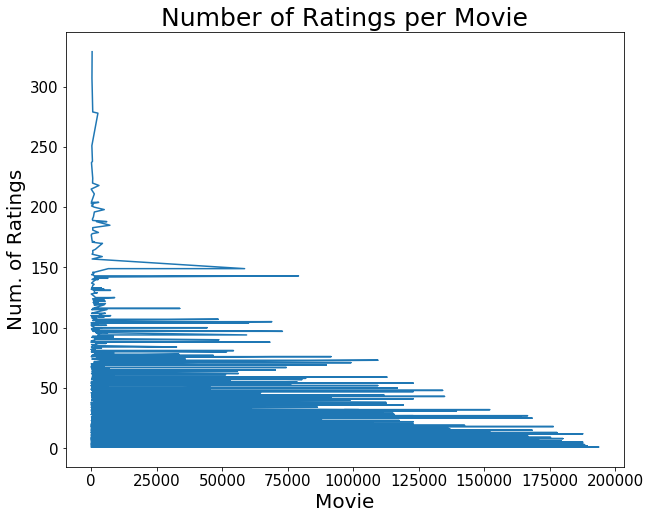

In [98]:
plt.subplots(figsize = (10, 8))
plt.plot(sorted_num_ratings)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('Num. of Ratings')
plt.show();

Don't know why the fuck it's sideways like that 🤬

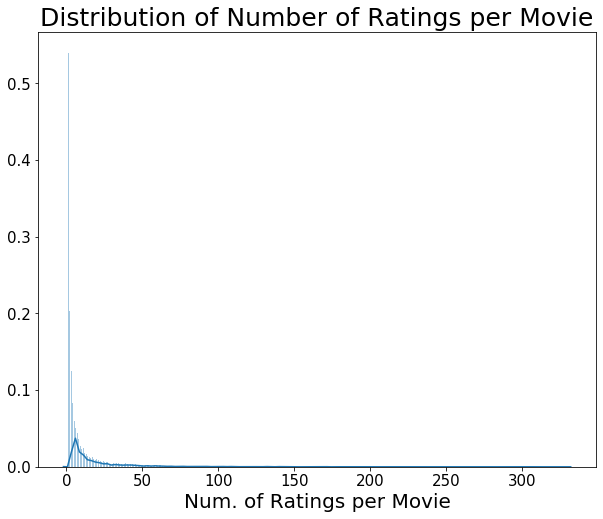

In [103]:
plt.subplots(figsize = (10, 8))
sns.distplot(sorted_num_ratings, bins = 500)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Num. of Ratings per Movie')
# plt.ylabel('')
plt.show();

In [104]:
movies = pd.read_csv(parent_dir + 'data/mod_movies_lc', index_col = 0)
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [105]:
movies.sample(5)

,movieId,title,genres
3035,4063,Prelude to a Kiss (1992),Comedy|Drama|Romance
2353,3112,'night Mother (1986),Drama
6896,63479,Sex Drive (2008),Comedy
5265,8644,"I, Robot (2004)",Action|Adventure|Sci-Fi|Thriller
3190,4299,"Knight's Tale, A (2001)",Action|Comedy|Romance


In [107]:
test = movies.sample(5)

In [118]:
for i, movie in test.iterrows():
    print(movie['movieId'])

1562
6755
2207
4207
63239


In [110]:
test

,movieId,title,genres
1174,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller
4549,6755,Bubba Ho-tep (2002),Comedy|Horror
1654,2207,Jamaica Inn (1939),Drama
3127,4207,Navy Seals (1990),Action|Adventure|War
6890,63239,Cinderella (1997),Children|Fantasy|Musical|Romance


In [141]:
movies[movies['movieId'] == 50]['title'].values[0]

'Usual Suspects, The (1995)'

In [123]:
titles = test['title']

In [124]:
titles

1174    Batman & Robin (1997)
4549      Bubba Ho-tep (2002)
1654       Jamaica Inn (1939)
3127        Navy Seals (1990)
6890        Cinderella (1997)
Name: title, dtype: object

In [125]:
for title in titles:
    print(title)

Batman & Robin (1997)
Bubba Ho-tep (2002)
Jamaica Inn (1939)
Navy Seals (1990)
Cinderella (1997)


In [ ]:
movies.loc[]